In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
data_path = r"D:\ml\kaggle datasets\dataset"

In [3]:
categories = os.listdir(data_path)

In [4]:
categories

['without_mask', 'with_mask']

In [5]:
labels = [i for i in range(len(categories))]

In [6]:
labels

[0, 1]

In [7]:
label_dict = dict(zip(categories,labels))

In [8]:
label_dict

{'without_mask': 0, 'with_mask': 1}

In [9]:
img_size = 100
data =[]
target = []

In [10]:
for category in categories:
    folder_path = os.path.join(data_path,category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        image_path = os.path.join(folder_path,img_name)
        img = cv2.imread(image_path)
        
        try:
            img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized_img = cv2.resize(img_gray,(img_size,img_size))
            data.append(resized_img)
            target.append(label_dict[category])
        except Exception as e:
            print("Exception:",e)

Exception: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor

Exception: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor

Exception: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor

Exception: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor

Exception: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor

Exception: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\colo

In [11]:
len(data),len(target)

(4428, 4428)

In [12]:
target = np.array(target)

In [13]:
target = target.reshape(-1,1)

In [14]:
target.shape

(4428, 1)

In [15]:
data = np.array(data)/255.0

In [16]:
data = np.reshape(data,(data.shape[0],img_size,img_size,1))

In [17]:
data.shape

(4428, 100, 100, 1)

In [18]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [19]:
model = Sequential()

#1st layer
model.add(Conv2D(filters = 6,kernel_size = (3,3),strides = (1,1),padding = 'valid',input_shape = (100,100,1))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

#2nd layer
model.add(Conv2D(filters = 16,kernel_size = (3,3),strides = (2,2),padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(120,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 6)         60        
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        880       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [21]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.1,random_state = 42)
for train_index,test_index in split.split(data,target):
    X_train,y_train = data[train_index],target[train_index]
    X_test,y_test = data[test_index],target[test_index]

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3985, 100, 100, 1), (443, 100, 100, 1), (3985, 1), (443, 1))

In [25]:
model.fit(X_train,y_train,epochs = 25,validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 3188 samples, validate on 797 samples
Epoch 1/25
3188/3188 [==============================] - 15s 5ms/step - loss: 0.6086 - accuracy: 0.6719 - precision: 0.6175 - recall: 0.7389 - val_loss: 0.5035 - val_accuracy: 0.7465 - val_precision: 0.6841 - val_recall: 0.8038
Epoch 2/25
3188/3188 [==============================] - 13s 4ms/step - loss: 0.4667 - accuracy: 0.7826 - precision: 0.7085 - recall: 0.8248 - val_loss: 0.3530 - val_accuracy: 0.8670 - val_precision: 0.7348 - val_recall: 0.8320
Epoch 3/25
3188/3188 [==============================] - 13s 4ms/step - loss: 0.3625 - accuracy: 0.8394 - precision: 0.7571 - recall: 0.8426 - val_loss: 0.2892 - val_accuracy: 0.8971 - val_precision: 0.7737 - val_recall: 0.8487
Epoch 4/25
3188/3188 [==============================] - 13s 4ms/step - loss: 0.3106 - accuracy: 0.8698 - precision: 0.7860 - recall: 0.8569 - val_loss: 0.2747 - val_accuracy: 0.9009 - val_precision: 0.7986 - val_recall: 0.86

In [26]:
model.evaluate(X_test,y_test)

443/443 [==============================] - 1s 3ms/step


[0.17204957859039846,
 0.9458239078521729,
 0.929636538028717,
 0.9422425031661987]

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred =(y_pred > 0.5 )

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test,y_pred)

In [31]:
cm

array([[178,  16],
       [  8, 241]], dtype=int64)

In [32]:
import matplotlib.pyplot as plt

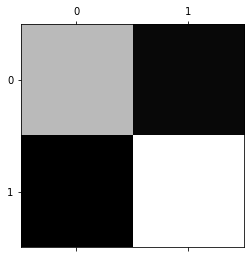

In [33]:
plt.matshow(cm, cmap = plt.cm.gray)

In [34]:
from keras.models import load_model

In [35]:
face_clsfr = cv2.CascadeClassifier(r'D:\ml\pre_trained_models\Face-Mask-Detector-master\haarcascade_frontalface_default.xml')

In [38]:
label_dict = {0:'WITHOUT_MASK',1:'MASK'}
color_dict = {0:(0,0,255),1:(0,255,0)}

In [44]:
video_capture = cv2.VideoCapture(0)

while(True):
    ret,img = video_capture.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_clsfr.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        face_img = gray[y:y+h,x:x+w]
        resize_img = cv2.resize(face_img,(100,100))
        normalized_img = resize_img/255.0
        reshaped_img = np.reshape(normalized_img,(1,100,100,1))
        result = model.predict(reshaped_img)
                
        label = np.argmax(result,axis = 1)[0]

        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img,label_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    
    cv2.imshow('LIVE',img)
    key = cv2.waitKey(1)
    
    if (key == 27):
        break
cv2.destroyAllWindows()
video_capture.release()
